In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json 
import math 

# Data and Main Variables

In [2]:
def medioid(embedding): 
    embedding = np.stack(embedding)
    rsm = embedding @ embedding.T 
    most_representative_index = np.argmax(np.sum(rsm, axis=1))
    return embedding[most_representative_index, :]

def mean(embedding): 
    return np.stack(embedding).mean(axis=0)

In [3]:
PATH_SPEECH_EMBEDDINGS = "data/embeddings/speech_embeddings.parquet"
PATH_VOCAB_EMBEDDINGS = "data/embeddings/vocab_embeddings.parquet"

In [4]:
models = [
    "jinaai/jina-embeddings-v3",
    "jinaai/jina-embeddings-v4"
    "Snowflake/snowflake-arctic-embed-l-v2.0", 
    "BAAI/bge-m3", 
    "sentence-transformers/all-MiniLM-L6-v2", 
    "sentence-transformers/all-mpnet-base-v2",
    "Qwen/Qwen3-Embedding-0.6B", 
    "google/embeddinggemma-300m",
]

In [6]:
df = pd.read_parquet(PATH_SPEECH_EMBEDDINGS)
vocab_df = pd.read_parquet(PATH_VOCAB_EMBEDDINGS)

color_maps = {
    "party": json.load(open("plotting_parameters/color_maps/color_map_party.json")), 
    "block": json.load(open("plotting_parameters/color_maps/color_map_block.json"))
}

In [7]:
df[df["translatedText"].str.contains("полезныe")]

,Unnamed: 0,speaker,text,date,agenda,speechnumber,procedure_ID,partyfacts_ID,period,chair,...,party,migration_prob,jinaai/jina-embeddings-v3,jinaai/jina-embeddings-v4,Snowflake/snowflake-arctic-embed-l-v2.0,BAAI/bge-m3,sentence-transformers/all-MiniLM-L6-v2,sentence-transformers/all-mpnet-base-v2,Qwen/Qwen3-Embedding-0.6B,google/embeddinggemma-300m
40607,40607,Joachim Stanisław Brudziński,Panie Przewodniczący! Chciałbym rozpocząć od s...,2021-10-05,5. The situation in Belarus after one year of ...,4,,6400.0,9,False,...,ECR,0.331276,"[-0.0005912781, -0.056396484, 0.027832031, -0....","[0.0010586239, -0.031224145, 0.024690606, -0.0...","[0.022319714, 0.07817144, -0.025548065, -0.025...","[-0.016657036, 0.046882212, -0.04383306, -0.02...","[-0.024011804, 0.06928337, -0.048870567, 0.000...","[0.012411715, -0.004961716, 0.022271335, 0.015...","[0.05134259, -0.03455558, -0.0080156075, 0.042...","[-0.056483272, -0.03583991, -0.043544322, -0.0..."


In [8]:
len(vocab_df[vocab_df["word"] == "przewodnictwo"])

1

In [9]:
len(df[df["translatedText"].str.contains("przewodnictwo")])

0

In [ ]:
# df = df[(df['text'].str.len() < 1_300) & (df['text'].str.len() > 700)]
# df = df[df["year"] > 2012]

In [10]:
EMBEDDING_COLUMN = models[4]
AGGREGATION_VARIABLE = "block"
AGGREGATION_METHOD = mean
color_map = color_maps[AGGREGATION_VARIABLE]

Total n: 9705


Text(0.5, 1.0, 'Number of speeches per party and year (total: 9705)')

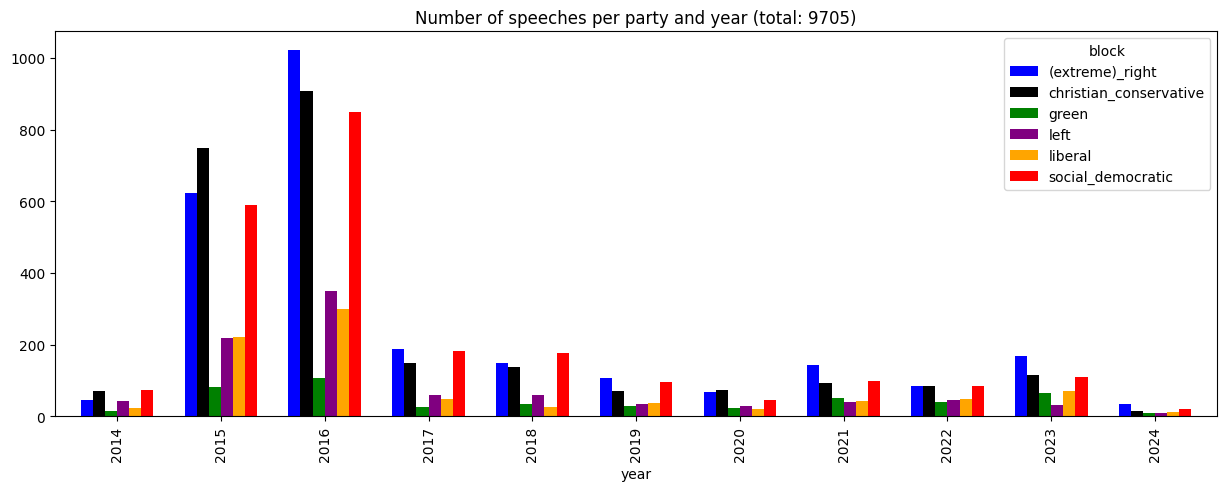

In [11]:
print("Total n:", len(df))
ax = df.groupby(["year", AGGREGATION_VARIABLE]).size().unstack().plot(kind="bar", stacked=False, figsize=(15, 5), width=0.7, color=color_map)
ax.set_title(f"Number of speeches per party and year (total: {len(df)})")
# ax.set_yscale("log")

# Helper Functions

In [12]:
def get_aggregated_embeddings_for_each_year(df: pd.DataFrame, embedding_column: str, aggregate_on: str, embedding_agg_method=mean):
    yearly_data = df.copy()
    yearly_data['year'] = pd.to_datetime(df['date']).dt.year
    aggregated_embeddings = yearly_data.groupby(by=[aggregate_on, 'year'])[embedding_column].agg(embedding_agg_method)
    return aggregated_embeddings.reset_index()

# Patterns over time

## PCA based shifts

In [13]:
from sklearn.decomposition import PCA


aggregated = get_aggregated_embeddings_for_each_year(df, EMBEDDING_COLUMN, AGGREGATION_VARIABLE, AGGREGATION_METHOD)
pca = PCA(n_components=2)
reduced = pca.fit_transform(np.stack(aggregated[EMBEDDING_COLUMN]))
print("PCA explained variance:", pca.explained_variance_.sum())

PCA explained variance: 0.014160392


In [ ]:
import re
from gensim import corpora



vocab = list(df['translatedText'].str.split().explode().apply(lambda word: {"cleared": re.sub(r'\W+', '', word).lower(),
                                                                      "original": word}))

vocab_cleared = list(map(lambda v: v["cleared"], vocab))
vocab_original = list(map(lambda v: v["original"], vocab))

PATH_DICTIONARY = "data/lda/dictionary_final.d"
dictionary = corpora.Dictionary.load(PATH_DICTIONARY)
vocab_dict = dictionary.token2id.keys()


# vocab_df_cleared = vocab_df[vocab_df["word"].isin(vocab_cleared)]
# vocab_df_original = vocab_df[vocab_df["word"].isin(vocab_original)]

dict_keys(['able', 'absence', 'abstain', 'afd', 'agreement', 'approve', 'arrest', 'ask', 'asset', 'barley', 'believe', 'big', 'black', 'body', 'bribery', 'brussels', 'buy', 'case', 'change', 'china', 'clear', 'colleague', 'come', 'commissioner', 'common', 'completely', 'compromise', 'concern', 'conduct', 'conflict', 'consider', 'conspicuous', 'continue', 'control', 'council', 'creation', 'criminal', 'culture', 'daily', 'de', 'deal', 'dear', 'decision', 'declare', 'demand', 'democracy', 'different', 'direction', 'doesn', 'door', 'dozen', 'election', 'enforce', 'enforcement', 'especially', 'ethic', 'exist', 'expert', 'explain', 'extreme', 'fail', 'finally', 'future', 'gift', 'good', 'great', 'hand', 'happy', 'hard', 'house', 'impose', 'improvement', 'impunity', 'include', 'independent', 'individual', 'influence', 'infringement', 'institution', 'interest', 'job', 'katarina', 'know', 'law', 'lead', 'learn', 'little', 'lobby', 'lobbying', 'lobbyist', 'long', 'lot', 'luxury', 'meeting', 'mep

In [73]:
print("przewodnictwo" in vocab_cleared)

True


In [55]:
print("cleared", len(vocab_df_cleared))
print("original", len(vocab_df_original))

cleared 13051
original 9262


In [75]:
vocab_df = vocab_df_original

In [76]:
cleaned_to_original = {pair['cleared']: pair['original'] for pair in vocab}

In [77]:
def closest_words_for_pc(k, eigen_vectors, vocab, probe_embs, top_n=20):
    pc_vec = eigen_vectors[k]
    pc_vec = pc_vec / np.linalg.norm(pc_vec)
    sims = probe_embs @ pc_vec   

    sorted_indices = np.argsort(sims)
    pos_idx = sorted_indices[-top_n:]
    mid_position = len(sorted_indices)//2
    mid_idx = sorted_indices[mid_position-math.floor(top_n/2) : mid_position+math.ceil(top_n/2)]
    neg_idx = sorted_indices[:top_n]


    def map_indices_to_examples(index_list): 
        if isinstance(vocab, pd.DataFrame) or isinstance(vocab, pd.Series): 
            return [(vocab.iloc[i], sims[i]) for i in index_list]
        else:
            return [(vocab[i], sims[i]) for i in index_list]

    return map_indices_to_examples(neg_idx), map_indices_to_examples(mid_idx), map_indices_to_examples(pos_idx)
    # return ([(vocab[i], sims[i]) for i in neg_idx], [(vocab[i], sims[i]) for i in reversed(pos_idx)])

## Combined

In [78]:
pca_axis_labels = [dict(), dict()]
for axis in [0, 1]: 
    pca_axis_neg, pca_axis_neutr, pca_axis_pos = closest_words_for_pc(axis, pca.components_, vocab_df['word'], np.stack(vocab_df[EMBEDDING_COLUMN]), top_n=3)
    pca_axis_labels[axis]["neg"] = pca_axis_neg
    pca_axis_labels[axis]["neutr"] = pca_axis_neutr
    pca_axis_labels[axis]["pos"] = pca_axis_pos

In [79]:
df

,Unnamed: 0,speaker,text,date,agenda,speechnumber,procedure_ID,partyfacts_ID,period,chair,...,party,migration_prob,jinaai/jina-embeddings-v3,jinaai/jina-embeddings-v4,Snowflake/snowflake-arctic-embed-l-v2.0,BAAI/bge-m3,sentence-transformers/all-MiniLM-L6-v2,sentence-transformers/all-mpnet-base-v2,Qwen/Qwen3-Embedding-0.6B,google/embeddinggemma-300m
492,492,Karen Melchior,"Mr President, thank you very much to the Commi...",2024-04-24,22. Advance passenger information: enhancing a...,8,bill_26075_ID bill_26076_ID bill_26075_ID bi...,6401.0,9,False,...,ELDR/ALDE/Renew,0.393282,"[0.03173828, -0.05883789, 0.06347656, 0.061523...","[-0.017475849, -0.0234765, 0.01301684, 0.00316...","[0.029303519, 0.02908727, 0.04424794, 0.051043...","[0.00046046128, 0.041610897, -0.023090536, -0....","[0.020603927, -0.017596412, 0.0006259507, -0.0...","[0.009955298, 0.01231596, -0.031741396, 0.0164...","[-0.031322084, 0.030157333, -0.005754259, -0.0...","[-0.06368264, -0.01790871, 0.008169121, 0.0173..."
844,844,Tineke Strik,"Mr President, Commissioner. People who flee wa...",2024-04-23,17. EU-Egypt strategic and comprehensive partn...,9,,6403.0,9,False,...,Greens/EFA,0.423501,"[0.046142578, -0.076660156, 0.03930664, -0.024...","[-0.012335925, -0.012685713, 0.007637553, 0.03...","[0.0022561324, 0.03212409, 0.01491972, 0.02270...","[-0.014090479, 0.02344181, -0.032296076, 0.005...","[-0.03277658, 0.075279415, 0.00988437, -0.0314...","[0.050362997, 0.031640317, 0.0033627285, 0.010...","[0.0490291, -0.0001613221, -0.007507243, 0.003...","[-0.06358229, 0.05332363, -0.006831329, 0.0041..."
1050,1050,Anabela Rodrigues,"Senhora Presidente, em 2024, o tráfico de sere...",2024-04-22,20. Amending Directive 2011/36/EU on preventin...,10,bill_241_ID bill_241_ID,6402.0,9,False,...,NGL/The Left,0.375925,"[-0.02368164, -0.11767578, 0.041503906, -0.015...","[-0.006263365, -0.0037057083, 0.003096705, 0.0...","[0.017229473, 0.052975528, 0.015071628, -0.019...","[-0.037878938, 0.04945201, -0.028479485, 0.008...","[-3.740648e-05, 0.042549398, -0.01705076, -0.0...","[-0.016886365, 0.02107416, 0.022850083, -0.003...","[0.005645505, 0.03181904, -0.0033138462, 0.033...","[-0.049918693, -0.001202861, -0.008896867, -0...."
1054,1054,Beata Kempa,Pani Przewodnicząca! Pani Komisarz! Potrzebuje...,2024-04-22,20. Amending Directive 2011/36/EU on preventin...,14,bill_241_ID bill_241_ID,6400.0,9,False,...,ECR,0.256493,"[0.028686523, -0.09667969, 0.08251953, 0.00303...","[0.0019489997, -0.00825006, 0.032056473, 0.004...","[-0.011141846, -0.009032944, -0.04128787, 0.01...","[-0.023567535, 0.005077537, -0.07184075, 0.013...","[-0.0042979075, 0.079598755, -0.070720166, -0....","[0.0069901105, -0.003832352, 0.014021035, 0.03...","[-0.04446165, 0.02761738, -0.00755511, 0.07728...","[-0.035047594, 0.03835739, -0.051198084, 0.050..."
1056,1056,Dorien Rookmaker,"Voorzitter, dank u wel, meneer Engerer, want u...",2024-04-22,20. Amending Directive 2011/36/EU on preventin...,16,bill_241_ID bill_241_ID,6400.0,9,False,...,ECR,0.475315,"[0.02709961, -0.13085938, 0.049560547, -0.0139...","[-0.015246119, -0.009003674, 0.019220384, 0.01...","[-0.027185386, -0.015011083, 0.005534012, -0.0...","[-0.0021237587, -0.027706854, -0.04229295, 0.0...","[-0.10969446, 0.08347164, 0.015826896, -0.0843...","[0.05082612, -0.035786744, 0.014009577, 0.0413...","[-0.050546486, -0.012648543, -0.008574607, 0.0...","[-0.06766452, 0.015919995, -0.019874139, -0.01..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291519,291519,Ελισσάβετ Βόζεμπεργκ-Βρυωνίδη,"Αξιότιμε κύριε Juncker, στις προτεραιότητές σα...",2014-07-15,5. Statement by the candidate for President of...,25,,6398.0,8,False,...,PPE,0.604105,"[-0.03564453, -0.0859375, 0.028686523, -0.0071...","[-0.021253865, -0.018996341, 0.023672443, -0.0...","[-0.048912365, -0.015946127, 0.004076141, 0.01...","[-0.038675297, 0.0053934935, -0.045550633, 0.0...","[-0.03806851, 0.0095617175, 0.04833139, -0.006...","[0.0044212956, 0.0714

In [80]:
w = "przewodnictwo"

print(len(vocab_df_cleared[vocab_df_cleared["word"] == w]))
print(len(vocab_df[vocab_df["word"] == w]))
print(len(df[df["translatedText"].str.contains(w)]))

1
0
0


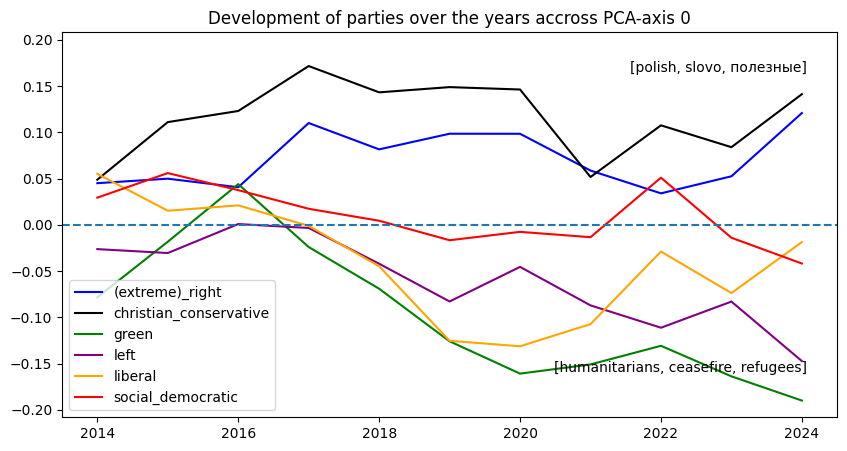

In [81]:
def plot_pca_axis_development(pca_axis):
    # pca_axis_labels = closest_words_for_pc(pca_axis, pca.components_, vocab_df['word'], np.stack(vocab_df[EMBEDDING_COLUMN]), top_n=3)

    f = plt.figure(figsize=(10, 5))
    plt.title(f"Development of parties over the years accross PCA-axis {pca_axis}")

    for party in aggregated[AGGREGATION_VARIABLE].unique():
        party_mask = aggregated[AGGREGATION_VARIABLE] == party
        years = aggregated[party_mask]['year']
        party_embeddings = reduced[party_mask]
        plt.plot(years, party_embeddings[:, pca_axis], color=color_map[party], label=party)

        # plt.ylim()

    max_y_lim = max(abs(plt.ylim()[0]), abs(plt.ylim()[1]))

    plt.ylim((-max_y_lim, max_y_lim))  
    plt.axhline(0, linestyle="--")

    ax_label_neg = ', '.join(map(lambda x: x[0], pca_axis_labels[pca_axis]['neg']))
    # ax_label_neutr = ', '.join(map(lambda x: x[0], pca_axis_labels[pca_axis]['neutr']))
    ax_label_pos = ', '.join(map(lambda x: x[0], pca_axis_labels[pca_axis]['pos']))

    # label for negative axis: 
    plt.figtext(0.87, 0.2, f"[{ax_label_neg}]", horizontalalignment="right")
    # label for positive axis: 
    # plt.figtext(0.87, 0.5, f"[{ax_label_neutr}]", horizontalalignment="right")
    # label for positive axis: 
    plt.figtext(0.87, 0.8, f"[{ax_label_pos}]", horizontalalignment="right")
    plt.legend(loc="lower left")
plot_pca_axis_development(0)


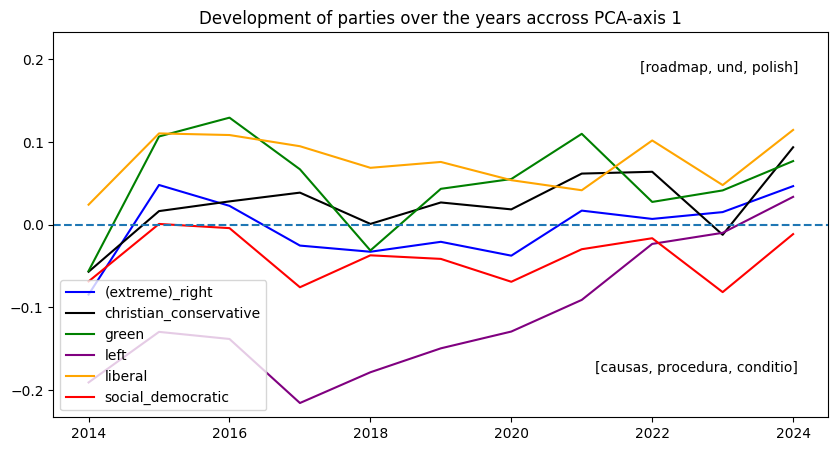

In [82]:
plot_pca_axis_development(1)

## Examples
### First: most extreme in full dataframe

In [83]:
def print_extreme_examlpes(axis, df_group):
    examples = closest_words_for_pc(axis, pca.components_, df_group, np.stack(df_group[EMBEDDING_COLUMN]), top_n=1)

    print(f"Axis {axis} ({list(map(lambda s: s[0], pca_axis_labels[axis]['neg']))} <=> {list(map(lambda s: s[0], pca_axis_labels[axis]['pos']))})")

    for i, polarity in enumerate(["-", "n", "+"]): 
        example = examples[i][0][0]
        similarity = examples[i][0][1]

        print(f"{polarity} score {similarity}: {example['speaker']} ({example['block']}) {example['date']} \n\t'{example['translatedText']}'")

In [84]:
print_extreme_examlpes(0, df)
print("\n")
print_extreme_examlpes(1, df)

Axis 0 (['humanitarians', 'ceasefire', 'refugees'] <=> ['polish', 'slovo', 'полезныe'])
- score -0.5402070879936218: Clare Daly (left) 2019-07-17 
	'Madam President, strip away the nice words and the reality is that Europe’s asylum and migration system is built around the desires of the arms industry, who profit twice. Firstly, from the wars that make people refugees in the first place and then reaping the rewards of multi-billion euro border-security contracts to keep the victims away from us. Now what sort of a choice is it? That you’re so desperate that you leave your family, your friends, everything you know and you’ve either got to gamble with your life on the Mediterranean – depending on the valiant efforts of NGOs – or you find yourself in a detention camp in Libya to be raped, starved, exploited and tortured. And do you know what? There seems to be no end to Europe’s attitude to keep Fortress Europe alive. The Commission’s contemptuous dismissal of the call by the UN to end the

### Now: per party per year

In [85]:
def print_extreme_examlpes_per_block_and_year(group, year, axis): 
    df_group = df[df["block"] == group]
    df_group_year = df_group[df_group["year"] == year]
    
    print("n", len(df_group_year))
    print_extreme_examlpes(axis, df_group_year)

    # per year, get most extreme (pos and negative), and most representative (medioid) 
print_extreme_examlpes_per_block_and_year("left", 2023, axis=1)

n 31
Axis 1 (['causas', 'procedura', 'conditio'] <=> ['roadmap', 'und', 'polish'])
- score -0.3149294853210449: Δημήτριος Παπαδημούλης (left) 2023-10-04 
	'Mr President, let's be honest, ladies and gentlemen colleagues, we need a common European migration and asylum policy, but to achieve it we need less hypocrisy and genuine solidarity among Member States: practical solidarity towards first-reception countries that are under tremendous pressure from migratory flows, such as my homeland Greece; shared responsibility of all Member States for mandatory, fair, and proportional relocation; legal and safe migration routes, so that the sacrifice of human lives can stop; a humane and effective integration policy, social and economic, which can boost local societies and economies; and absolute respect for international law, human rights, and the international commitments of the European Union and its Member States. You heard shouts a short while ago that show one thing: the far-right is exploi